# Second Dataset: MetaData from Kaggle
https://www.kaggle.com/karrrimba/movie-metadatacsv 



![My Title](coverpage.png)

### Importing necessary libraries 

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from surprise import Reader, Dataset, SVD, evaluate, SlopeOne, NMF, SVDpp, KNNBaseline, CoClustering, accuracy
from surprise.model_selection import cross_validate
from __future__ import (absolute_import, division, print_function,unicode_literals)
from surprise.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
    

In [2]:
df=pd.read_csv('movies_metadata.csv')
df.head()

C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [4]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

There are 45466 observations and 24 features in this dataset. 



### Information about Features

* **adult:** Indicates if the movie is X-Rated or Adult.
* **belongs_to_collection:** A stringified dictionary that gives information on the movie series the particular film belongs to.
* **budget:** The budget of the movie in dollars.
* **genres:** A stringified list of dictionaries that list out all the genres associated with the movie.
* **homepage:** The Official Homepage of the move.
* **id:** The ID of the move.
* **imdb_id:** The IMDB ID of the movie.
* **original_language:** The language in which the movie was originally shot in.
* **original_title:** The original title of the movie.
* **overview:** A brief blurb of the movie.
* **popularity:** The Popularity Score assigned by TMDB.
* **poster_path:** The URL of the poster image.
* **production_companies:** A stringified list of production companies involved with the making of the movie.
* **production_countries:** A stringified list of countries where the movie was shot/produced in.
* **release_date:** Theatrical Release Date of the movie.
* **revenue:** The total revenue of the movie in dollars.
* **runtime:** The runtime of the movie in minutes.
* **spoken_languages:** A stringified list of spoken languages in the film.
* **status:** The status of the movie (Released, To Be Released, Announced, etc.)
* **tagline:** The tagline of the movie.
* **title:** The Official Title of the movie.
* **video:** Indicates if there is a video present of the movie with TMDB.
* **vote_average:** The average rating of the movie.
* **vote_count:** The number of votes by users, as counted by TMDB.

# Data Cleaning

 For cleaning the data, I started with:
- dropping the duplicate rows. (13 duplicates)
- Just kept the rows wih False and True in adult column.
- I dropped the columns 'status','adult','homepage','imdb_id','original_title','poster_path','tagline','video','spoken_languages', since they are not providing important information for this project

- The ‘budget’ and ‘popularity’ columns have been changed to numeric.

- The ‘release_date’ has been changed to datetime format.

- ‘year’ column is added for future use.

- I used the literal_eval, apply and lambda to  change the format of ‘production_companies’, ‘genres’, and ‘production_countries’ columns.

In [5]:
df.drop_duplicates(inplace=True)

df=df[(df.adult=='False')|(df.adult=='True')]

df.drop(['status','adult','homepage','imdb_id',
          'original_title','poster_path','tagline','video','spoken_languages'],axis=1,inplace=True)#drop unnecessary columns

df['budget']=pd.to_numeric(df['budget'])
df['popularity']=pd.to_numeric(df['popularity'])
df=df[df.popularity.notnull()]

df['release_date']=pd.to_datetime(df['release_date'])
#df['year']=df['release_date'].dt.year
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
df['production_companies']=df.production_companies.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['genres']=df.genres.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['production_countries']=df.production_countries.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
#df['belongs_to_collection']=df.belongs_to_collection.fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x]if isinstance(x, list) else [])
df['return'] = df['revenue'] / df['budget']
_, numbers = np.unique(df.title, return_inverse=True)
df['movieId']=numbers
df.vote_average.dropna(inplace=True)

df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,year,return,movieId
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[Animation, Comedy, Family]",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,[Pixar Animation Studios],[United States of America],1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,1995,12.451801,39018
1,NaN,65000000,"[Adventure, Fantasy, Family]",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[TriStar Pictures, Teitler Film, Interscope Co...",[United States of America],1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,1995,4.043035,16806
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[Romance, Comedy]",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[Warner Bros., Lancaster Gate]",[United States of America],1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,1995,NaN,13371
3,NaN,16000000,"[Comedy, Drama, Romance]",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[Twentieth Century Fox Film Corporation],[United States of America],1995-12-22,81452156.0,127.0,Waiting to Exhale,6.1,34.0,1995,5.090760,40428
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0,[Comedy],11862,en,Just when George Banks has recovered from his ...,8.387519,"[Sandollar Productions, Touchstone Pictures]",[United States of America],1995-02-10,76578911.0,106.0,Father of the Bride Part II,5.7,173.0,1995,inf,11199


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 45447 entries, 0 to 45465
Data columns (total 18 columns):
belongs_to_collection    4490 non-null object
budget                   45447 non-null int64
genres                   45447 non-null object
id                       45447 non-null object
original_language        45436 non-null object
overview                 44493 non-null object
popularity               45447 non-null float64
production_companies     45447 non-null object
production_countries     45447 non-null object
release_date             45363 non-null datetime64[ns]
revenue                  45447 non-null float64
runtime                  45190 non-null float64
title                    45447 non-null object
vote_average             45447 non-null float64
vote_count               45447 non-null float64
year                     45447 non-null object
return                   10914 non-null float64
movieId                  45447 non-null int64
dtypes: datetime64[ns](1), float64

**Drop duplicated rows**

In [7]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
print('Unique IDs: ', df.id.nunique())
print('Unique movies: ',df.title.nunique())
df=df.drop(df[df[['title','year','release_date']].duplicated(keep='first')].sort_values(by='title').index,axis=0)
df.shape 

There are 45447 observations and 18 features in this dataset. 

Unique IDs:  45430
Unique movies:  42277


(45430, 18)

## Exploratory Data Analysis (Story telling)

**Total number of movies of each genre**

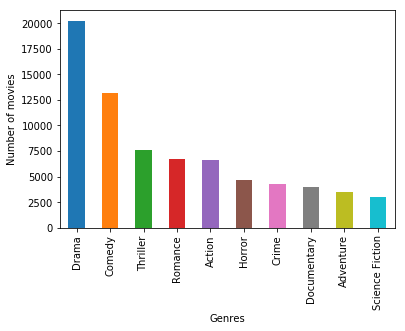

In [8]:
Genres=df.genres
Genres=Genres.apply(pd.Series).stack(level=-1,dropna=True)
Genres.value_counts().head(10).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Number of movies')
plt.savefig('1.png',dpi=300,bbox_inches='tight')
plt.show()

### Production countries


In [9]:
mask = df.production_countries.apply(lambda x: 'United States of America' in x)
print('USA total number of production is:',sum(mask))

USA total number of production is: 21140


_Some movies have more than one production country. I am using stack function to get the right count value production of each country_

In [10]:
Countries=df.production_countries
Countries=Countries.apply(pd.Series).stack(level=-1,dropna=True)
Countries.value_counts().head(10)

United States of America    21140
United Kingdom               4091
France                       3932
Germany                      2249
Italy                        2166
Canada                       1765
Japan                        1645
Spain                         964
Russia                        912
India                         827
dtype: int64

To get a better bar plot, I have ignored USA from the list, since USA has produced 5 times more than United Kingdom.

After USA, __UK, France and Germany__ have the highest number of production.

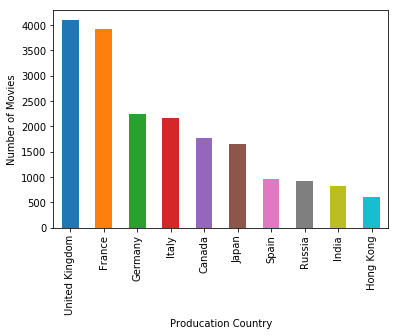

In [11]:
Countries.value_counts()[1:11].plot(kind='bar') #Ignore USA
plt.xlabel('Producation Country')
plt.ylabel('Number of Movies')
plt.savefig('2.png',dpi=300,bbox_inches='tight')
plt.show()

#### Average revenue of US, UK, and France

In [12]:
Countries=df[['production_countries','revenue']]
USA=df.loc[df.production_countries.apply(lambda x: 'United States of America' in x),'revenue']
UK=df.loc[df.production_countries.apply(lambda x: 'United Kingdom' in x),'revenue',]
France=df.loc[df.production_countries.apply(lambda x: 'France' in x),'revenue']

print('USA avg revenue is:' ,USA.mean())
print('UK avg revenue is: ',UK.mean())
print('France avg revenue is: ',France.mean())

USA avg revenue is: 22534331.03935667
UK avg revenue is:  17949958.819848448
France avg revenue is:  5156112.683621567


### Production companies

Since some movies have more than one producation company, I used stack function to get the right value counts of each company.

__Warner Bros., Metro-Goldwyn-Mayer (MGM)__, and __Paramount Pictures__ have the highest number of production.

In [13]:
Companies=df['production_companies']
Companies=Companies.apply(pd.Series).stack(level=-1,dropna=True)
Companies.value_counts().head(10)

Warner Bros.                              1250
Metro-Goldwyn-Mayer (MGM)                 1074
Paramount Pictures                        1001
Twentieth Century Fox Film Corporation     836
Universal Pictures                         830
Columbia Pictures Corporation              448
Canal+                                     436
Columbia Pictures                          431
RKO Radio Pictures                         290
United Artists                             279
dtype: int64

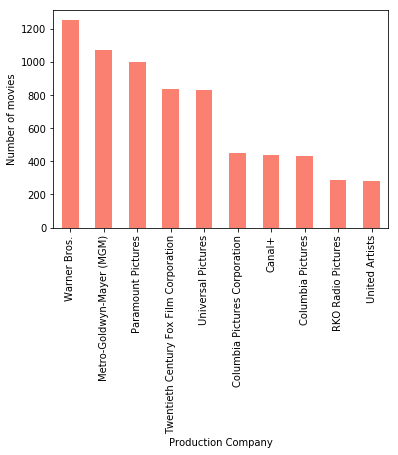

In [14]:
Companies.value_counts().head(10).plot(kind='bar',color='salmon')
plt.xlabel('Production Company')
plt.ylabel('Number of movies')
plt.savefig('3.png',dpi=300,bbox_inches='tight')
plt.show()

### Highest Earning Production Companies
Lets find out which production companies have earned the most money from the movie making business.
__Warner Bros., Universal Pircure__, and __Paramount Pictures__ have the highest total revenue respectively.


In [15]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'
com_df = df.drop('production_companies', axis=1).join(s)
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)
com_pivot.sort_values('Total', ascending=False).head(10)

C:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  # This is added back by InteractiveShellApp.init_path()


,Total,Average,Number
Warner Bros.,6.352519e+10,5.082015e+07,1250
Universal Pictures,5.525919e+10,6.657734e+07,830
Paramount Pictures,4.876940e+10,4.872068e+07,1001
Twentieth Century Fox Film Corporation,4.768775e+10,5.704276e+07,836
Walt Disney Pictures,4.083727e+10,1.552748e+08,263
Columbia Pictures,3.227974e+10,7.489498e+07,431
New Line Cinema,2.217339e+10,8.004834e+07,277
Amblin Entertainment,1.734372e+10,2.282068e+08,76
DreamWorks SKG,1.547575e+10,1.629027e+08,95
Dune Entertainment,1.500379e+10,2.308275e+08,65


 From the companies with higher prodcution number of 500, **Universal Pictures**, **Twentieth Century Fox Film Corporation**, and __Warner Bros__. have the highest average revenue respectively.

In [16]:
com_pivot[com_pivot.Number>=500].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Universal Pictures,5.525919e+10,6.657734e+07,830
Twentieth Century Fox Film Corporation,4.768775e+10,5.704276e+07,836
Warner Bros.,6.352519e+10,5.082015e+07,1250
Paramount Pictures,4.876940e+10,4.872068e+07,1001
Metro-Goldwyn-Mayer (MGM),1.237679e+10,1.152401e+07,1074


*Just check how many movies have higher, lower and equal budget than revenus.*

In [17]:
print('Movies with higher revenue than budget:',sum((df['revenue']-df['budget'])>0))  
print('Movies with lower revenue than budget:',sum((df['revenue']-df['budget'])<0)) 
print('movies with equal revenue than budget:',sum((df['revenue']-df['budget'])==0))

Movies with higher revenue than budget: 5775
Movies with lower revenue than budget: 5108
movies with equal revenue than budget: 34547


### Revenue

* **Avator, Star wars: The force awakens**, and **Titanic** are the movies
with the max revenue. 

In [18]:
df.sort_values(by='revenue',ascending=False).head(10)['title']

14551                                          Avatar
26555                    Star Wars: The Force Awakens
1639                                          Titanic
17818                                    The Avengers
25084                                  Jurassic World
28830                                       Furious 7
26558                         Avengers: Age of Ultron
17437    Harry Potter and the Deathly Hallows: Part 2
22110                                          Frozen
42222                            Beauty and the Beast
Name: title, dtype: object

Some movies with vote_averge of 10 is presented bellow. 190 movies have the vote_average of 10.

In [19]:
df[df.vote_average==10].sort_values(by='vote_count',ascending=False)[['title','vote_count','vote_average']].head(10)

,title,vote_count,vote_average
32440,Butterfly,3.0,10.0
36633,Avetik,3.0,10.0
42614,Frankie Boyle: Hurt Like You've Never Been Loved,3.0,10.0
34296,Mera Naam Joker,3.0,10.0
35200,Maidan,3.0,10.0
26170,Katt Williams: Priceless: Afterlife,2.0,10.0
27295,The Little Hut,2.0,10.0
27814,Kolka Cool,2.0,10.0
30143,At Ellen’s Age,2.0,10.0
32873,Redemption,2.0,10.0


The movies with highest revenue do not have the highest popularity and vote_average. Though the total number of votes for each movie is important.

In [20]:
df.sort_values(by='revenue',ascending=False).head(10)[['title','popularity','vote_average','revenue']]#10 highest revenue

,title,popularity,vote_average,revenue
14551,Avatar,185.070892,7.2,2.787965e+09
26555,Star Wars: The Force Awakens,31.626013,7.5,2.068224e+09
1639,Titanic,26.889070,7.5,1.845034e+09
17818,The Avengers,89.887648,7.4,1.519558e+09
25084,Jurassic World,32.790475,6.5,1.513529e+09
28830,Furious 7,27.275687,7.3,1.506249e+09
26558,Avengers: Age of Ultron,37.379420,7.3,1.405404e+09
17437,Harry Potter and the Deathly Hallows: Part 2,24.990737,7.9,1.342000e+09
22110,Frozen,24.248243,7.3,1.274219e+09
42222,Beauty and the Beast,287.253654,6.8,1.262886e+09


The most voted movies are **Inception, The Dark Knight**, and **Avatar**.

In [21]:
df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
15480,Inception,14075.0,2010
12481,The Dark Knight,12269.0,2008
14551,Avatar,12114.0,2009
17818,The Avengers,12000.0,2012
26564,Deadpool,11444.0,2016
22879,Interstellar,11187.0,2014
20051,Django Unchained,10297.0,2012
23753,Guardians of the Galaxy,10014.0,2014
2843,Fight Club,9678.0,1999
18244,The Hunger Games,9634.0,2012


### Most popular
The first three most popular movies are **Minions, Wonder Woman, and Beauty and the beast.**



The Popularity score seems to be an extremely skewed quentity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

In [22]:
df.sort_values(by='popularity',ascending=False).head(10)[['title','popularity','vote_average','revenue']] #10 most popular

,title,popularity,vote_average,revenue
30700,Minions,547.488298,6.4,1.156731e+09
33356,Wonder Woman,294.337037,7.2,8.205804e+08
42222,Beauty and the Beast,287.253654,6.8,1.262886e+09
43644,Baby Driver,228.032744,7.2,2.245113e+08
24455,Big Hero 6,213.849907,7.8,6.521054e+08
26564,Deadpool,187.860492,7.4,7.831130e+08
26566,Guardians of the Galaxy Vol. 2,185.330992,7.6,8.634161e+08
14551,Avatar,185.070892,7.2,2.787965e+09
24351,John Wick,183.870374,7.0,8.876166e+07
23675,Gone Girl,154.801009,7.9,3.693304e+08


*Movies with more than 2000 votes and highesr vote average are listed bellow.*

__The Shawshank Redemption, Godfather__, and __Life is beautiful__ are the first three in this list.

In [23]:
df[df['vote_count'] > 2000][['title', 'vote_average', 'vote_count' ,'year']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count,year
314,The Shawshank Redemption,8.5,8358.0,1994
834,The Godfather,8.5,6024.0,1972
2211,Life Is Beautiful,8.3,3643.0,1997
5481,Spirited Away,8.3,3968.0,2001
1152,One Flew Over the Cuckoo's Nest,8.3,3001.0,1975
1176,Psycho,8.3,2405.0,1960
2843,Fight Club,8.3,9678.0,1999
1178,The Godfather: Part II,8.3,3418.0,1974
12481,The Dark Knight,8.3,12269.0,2008
292,Pulp Fiction,8.3,8670.0,1994


### Release time
Plotting the total number of movies produced each year.

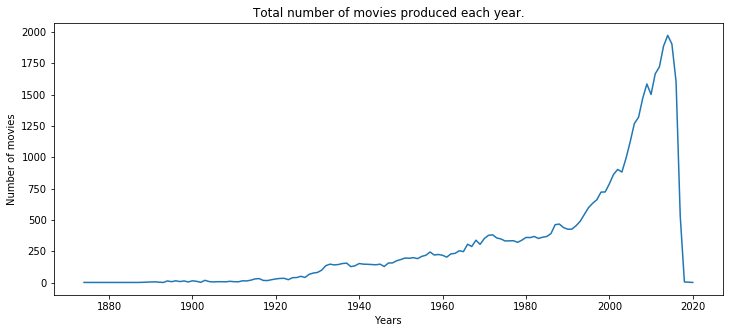

In [24]:
plt.figure(figsize=(12,5))
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].dt.year.value_counts().sort_index().plot()
plt.xlabel('Years')
plt.ylabel('Number of movies')
plt.title('Total number of movies produced each year.')
plt.savefig('3.png',dpi=300,bbox_inches='tight')
plt.show()


Total number of movies release each month. (Most movies release in **January**)

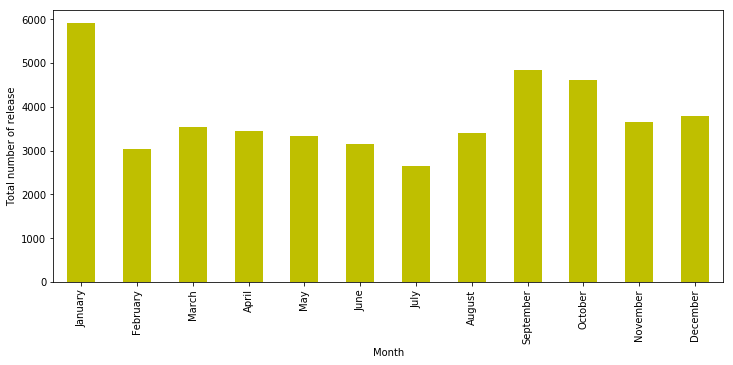

In [25]:
plt.figure(figsize=(12,5))
df['release_date'].dt.month.value_counts().sort_index().plot.bar( color='y')
plt.xlabel('Month')
plt.xticks(np.arange(12),('January', 'February', 'March', 'April', 'May', 'June', 'July',
              'August', 'September', 'October', 'November', 'December'))
plt.ylabel('Total number of release')
plt.savefig('3.png',dpi=300,bbox_inches='tight')
plt.show()

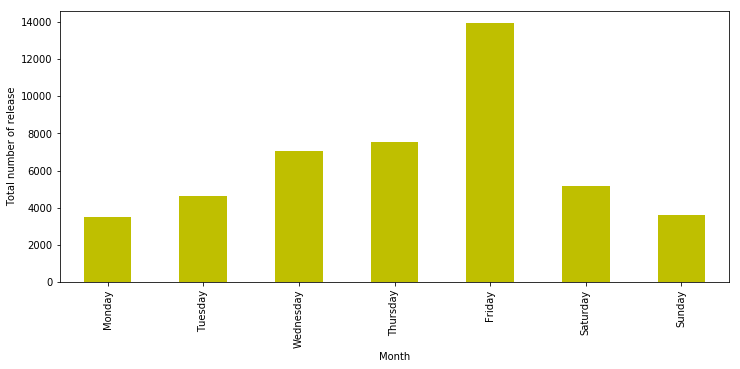

In [26]:
plt.figure(figsize=(12,5))
df['release_date'].dt.weekday.value_counts().sort_index().plot.bar( color='y')
plt.xlabel('Month')
plt.xticks(np.arange(7),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.ylabel('Total number of release')
plt.savefig('3.png',dpi=300,bbox_inches='tight')

plt.show()

Most movies release on first day of each month.

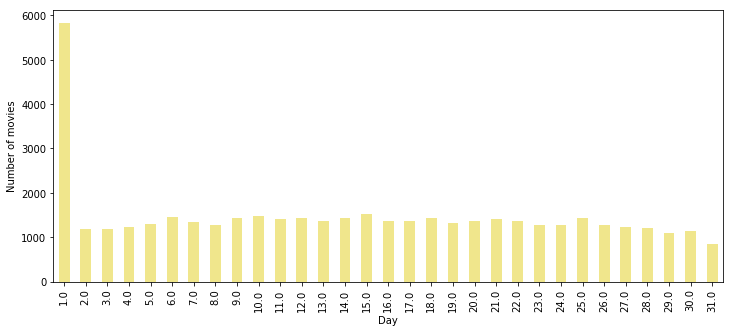

In [27]:
plt.figure(figsize=(12,5))
df['release_date'].dt.day.value_counts().sort_index().plot.bar(color='khaki')
plt.xlabel('Day')
plt.ylabel('Number of movies')
plt.savefig('3.png',dpi=300,bbox_inches='tight')
plt.show()

**French, Italian, and Japanese** are the second, third and fourth languages.

Total number of movies in English are: 45430


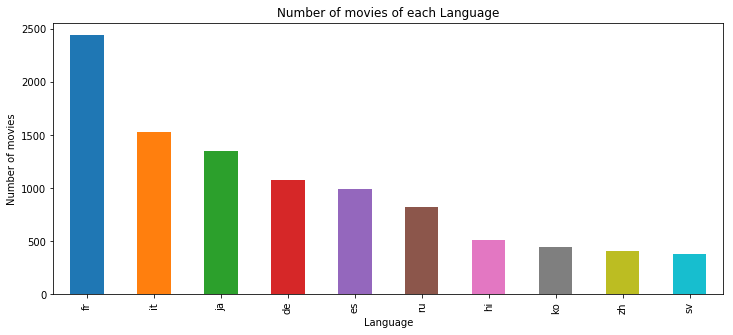

In [28]:
print('Total number of movies in English are:',len(df['original_language']=='en'))

plt.figure(figsize=(12,5))
df[df['original_language']!='en']['original_language'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Language')
plt.ylabel('Number of movies')
plt.title('Number of movies of each Language')
plt.savefig('4.png',dpi=300,bbox_inches='tight')
plt.show() #except En

### Correlation
- Budget and revenue are 77% correlated.
- Budget and vote_count are around 67% correlated.
- popularity and revenue are 50% correlated.
- popularity and vote_count are 56% correlated.
- Revenue and vote_count are 81% correlated.

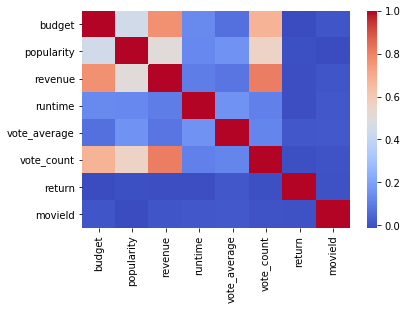

,budget,popularity,revenue,runtime,vote_average,vote_count,return,movieId
budget,1.000000,0.449682,0.768825,0.134700,0.073496,0.676699,-0.012572,0.010009
popularity,0.449682,1.000000,0.506221,0.129912,0.154357,0.559995,-0.003946,-0.009621
revenue,0.768825,0.506221,1.000000,0.103948,0.083883,0.812031,-0.005515,0.007910
runtime,0.134700,0.129912,0.103948,1.000000,0.158192,0.113555,-0.005189,0.012001
vote_average,0.073496,0.154357,0.083883,0.158192,1.000000,0.123611,0.013161,0.015532
vote_count,0.676699,0.559995,0.812031,0.113555,0.123611,1.000000,-0.003041,0.005362
return,-0.012572,-0.003946,-0.005515,-0.005189,0.013161,-0.003041,1.000000,0.000810
movieId,0.010009,-0.009621,0.007910,0.012001,0.015532,0.005362,0.000810,1.000000


In [29]:
sns.heatmap(df.corr(),cmap='coolwarm')
plt.savefig('corr.png',dpi=300,bbox_inches='tight')
plt.show() #correlation 
df.corr()

 ## Title and Overview Wordclouds
There are certain words that use more often in titles and overviews. I use WordCloud library to find out what are these words.

The word **Love** is the most commonly used word in movie titles. **Girl**, **Day** and **Man** are also among the most commonly occurring words. 

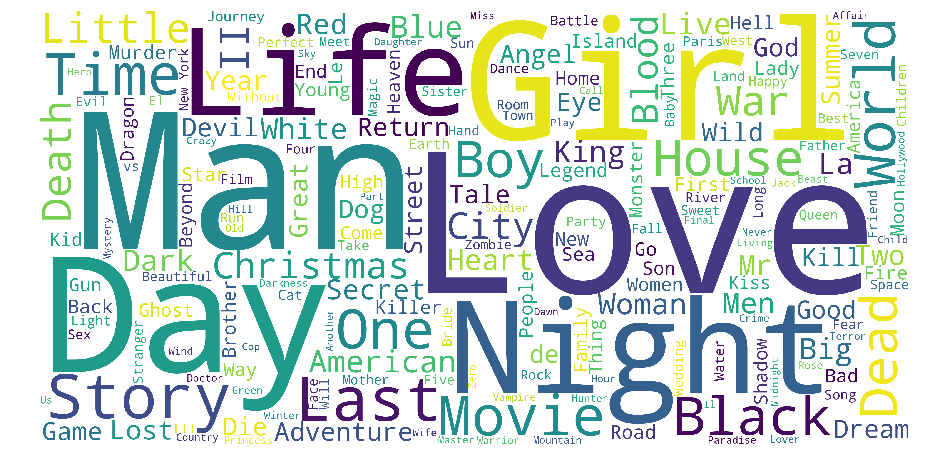

In [30]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.savefig('word1.png',dpi=300,bbox_inches='tight')
plt.show()

**Life** is the most commonly used word in Movie titles. **One** and **Find** are also popular.

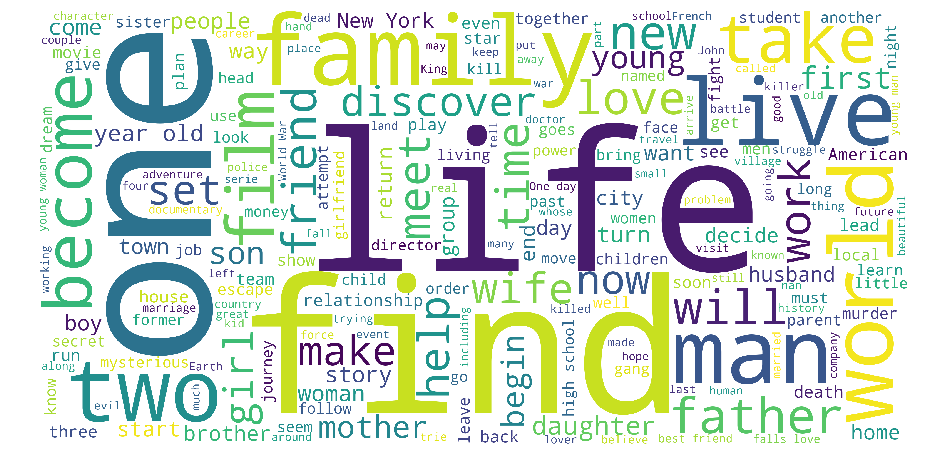

In [31]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.savefig('word2.png',dpi=300,bbox_inches='tight')
plt.show()

# Statistics



### Popularity

The Popularity score seems to be an extremely skewed quantity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score of less than 10 (the 75th percentile is at 3.678902).


**Minions** is the most popular movie by the TMDB Popularity Score. __Wonder Woman__ and __Beauty and the Beast__, two extremely successful woman centric movies come in second and third respectively.

Statistics about Popularity
count    45430.000000
mean         2.921206
std          6.006708
min          0.000000
25%          0.385872
50%          1.127238
75%          3.678128
max        547.488298
Name: popularity, dtype: float64
 


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


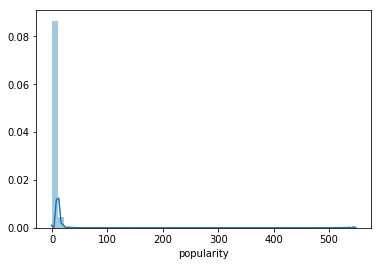

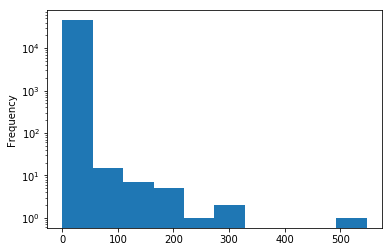

,title,popularity,year
30700,Minions,547.488298,2015
33356,Wonder Woman,294.337037,2017
42222,Beauty and the Beast,287.253654,2017
43644,Baby Driver,228.032744,2017
24455,Big Hero 6,213.849907,2014
26564,Deadpool,187.860492,2016
26566,Guardians of the Galaxy Vol. 2,185.330992,2017
14551,Avatar,185.070892,2009
24351,John Wick,183.870374,2014
23675,Gone Girl,154.801009,2014


In [32]:
print('Statistics about Popularity')
print(df.popularity.describe())
print(' ')

sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()


df['popularity'].plot(logy=True, kind='hist')
plt.savefig('s1.png',dpi=300,bbox_inches='tight')
plt.show()


df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

### Vote average 
The mean rating is only a 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6. 

Statistics about vote_avg
count    45430.000000
mean         5.618329
std          1.924139
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64
 


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


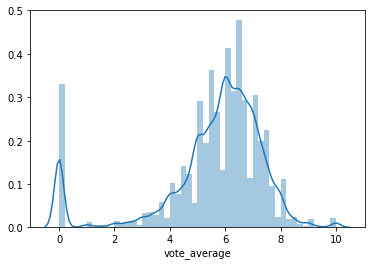

In [33]:

print('Statistics about vote_avg')
print(df.vote_average.describe())
print(' ')


sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))
plt.savefig('s1.png',dpi=300,bbox_inches='tight')
plt.show()


### Revenue

The revenue statistics for movies with more than 2000 votes. The distribution plot is skewed to the right.


Statistics about Revenue
count    5.120000e+02
mean     4.139510e+08
std      3.354796e+08
min      1.000000e+06
25%      1.705235e+08
50%      3.347582e+08
75%      5.851754e+08
max      2.787965e+09
Name: revenue, dtype: float64


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


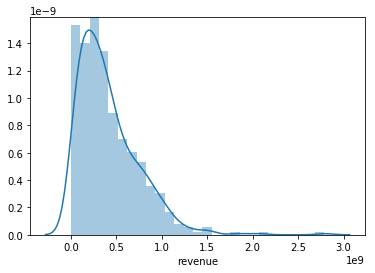

In [34]:
print('Statistics about Revenue')
print(df[df['vote_count']>2000]['revenue'].describe())

sns.distplot(df[df['vote_count']>2000]['revenue'].fillna(df['revenue'].median()))
plt.savefig('s1.png',dpi=300,bbox_inches='tight')
plt.show()

### Runtime

The average length of a movie is about 1 hour and 30 minutes. The longest movie on record in this dataset is a staggering 1256 minutes (or 20 hours) long.

Statistics about Runtime
count    45430.000000
mean        94.129254
std         38.306780
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


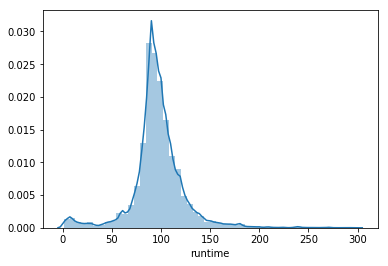

In [35]:
print('Statistics about Runtime')
print(df['runtime'].fillna(df['runtime'].median()).describe())

sns.distplot(df[(df['runtime']<300)&(df['runtime']>0)]['runtime'].fillna(df['runtime'].median()))
plt.savefig('s1.png',dpi=300,bbox_inches='tight')
plt.show()

#### Shortest  and longest movies


* We can see there is several one minute lenght movies.

* All these long time films are TV series and we dont have acceess to the runtime of each episode in this dataset.

In [36]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime').head(10)

,runtime,title,year
41870,1.0,Mr. Edison at Work in His Chemical Laboratory,1897
44694,1.0,Grandma's Reading Glass,1900
44693,1.0,"What Happened on Twenty-Third Street, New York...",1901
37996,1.0,The Magician,1898
44672,1.0,Panorama pris d'un train en marche,1898
44669,1.0,"Divers at Work on the Wreck of the ""Maine""",1898
44668,1.0,After the Ball,1897
44665,1.0,Between Calais and Dover,1897
44655,1.0,The Surrender of Tournavos,1897
19138,1.0,Blacksmith Scene,1893


In [37]:
df[df['runtime'] > 0][['runtime', 'title', 'year']].sort_values('runtime',ascending=False).head(10)

,runtime,title,year
24178,1256.0,Centennial,1978
19965,1140.0,Jazz,2001
40938,1140.0,Baseball,1994
13767,931.0,Berlin Alexanderplatz,1980
13953,925.0,Heimat: A Chronicle of Germany,1984
27855,900.0,The Story of Film: An Odyssey,2011
26682,877.0,Taken,2002
19158,874.0,The War,2007
34667,840.0,The Roosevelts: An Intimate History,2014
34732,840.0,Seventeen Moments in Spring,1973


### Budget


The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars.

count    4.543000e+04
mean     4.224828e+06
std      1.742853e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64


C:\Python\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


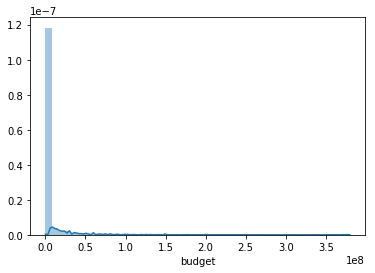

In [38]:
print(df['budget'].describe())

sns.distplot(df[df['budget'].notnull()]['budget'])


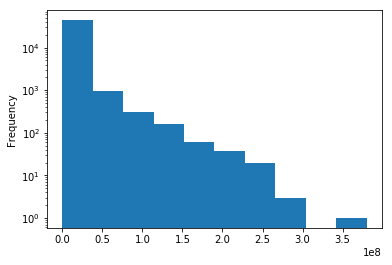

In [39]:
df['budget'].plot(logy=True, kind='hist')
plt.savefig('s1.png',dpi=300,bbox_inches='tight')
plt.show()

# Recommender System





## 1- Simple Recommender

The Simple Recommender offers generalized recommnendations to every user based on movie popularity, ratings, number of votes and genre. The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. This model does not give personalized recommendations based on the user. 

So I sort the movies base on their genre, and I recommend the ones with the highest number of votes and the higher average rankings to the new audience.

In [40]:
df1=df[['title','genres','id','popularity','movieId','vote_average','vote_count']].dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45430 entries, 0 to 45465
Data columns (total 7 columns):
title           45430 non-null object
genres          45430 non-null object
id              45430 non-null object
popularity      45430 non-null float64
movieId         45430 non-null int64
vote_average    45430 non-null float64
vote_count      45430 non-null float64
dtypes: float64(3), int64(1), object(3)
memory usage: 2.8+ MB


In [41]:
sep = df1.reset_index().set_index(['title','movieId','vote_average','popularity','vote_count'])['genres'].apply(pd.Series).stack()
sep = sep.reset_index()
sep.columns=['title','movieId','vote_average','popularity','vote_count','level','genres']
sep.drop('level',axis=1,inplace=True)

In [42]:
sep.head()

,title,movieId,vote_average,popularity,vote_count,genres
0,Toy Story,39018,7.7,21.946943,5415.0,Animation
1,Toy Story,39018,7.7,21.946943,5415.0,Comedy
2,Toy Story,39018,7.7,21.946943,5415.0,Family
3,Jumanji,16806,6.9,17.015539,2413.0,Adventure
4,Jumanji,16806,6.9,17.015539,2413.0,Fantasy


### The list of the 15 best Drama movies to recommend are:

In [43]:
a=sep[(sep.genres=='Drama')&(sep.vote_average>8)&(sep.popularity>5)&(sep.vote_count>2000)].sort_values('vote_count',ascending=False).head(15)
b=sep[(sep.genres=='Drama')&(sep.vote_average>8)&(sep.popularity>5)&(sep.vote_count>2000)].sort_values('vote_average',ascending=False).head(15)
c=a.merge(b,how='outer').sort_values('vote_count',ascending=False).reset_index()
c.title.head(15)
         

0              The Dark Knight
1                 Interstellar
2                   Fight Club
3     The Shawshank Redemption
4                 Forrest Gump
5                The Godfather
6             The Intouchables
7             Schindler's List
8                     Whiplash
9       Leon: The Professional
10              The Green Mile
11           Life Is Beautiful
12      The Godfather: Part II
13          The Usual Suspects
14                  GoodFellas
Name: title, dtype: object

### The list of the 15 best Romance movies to recommend are:

In [44]:
a=sep[(sep.genres=='Romance')&(sep.vote_average>7)&(sep.popularity>5)&(sep.vote_count>1000)].sort_values('vote_count',ascending=False).head(15)
b=sep[(sep.genres=='Romance')&(sep.vote_average>7)&(sep.popularity>5)&(sep.vote_count>1000)].sort_values('vote_average',ascending=False).head(15)
c=a.merge(b,how='outer').sort_values('vote_count',ascending=False).reset_index()
c.title.head(15)

0                              Forrest Gump
1                                   Titanic
2                                La La Land
3                                       Her
4                          The Great Gatsby
5                    The Fault in Our Stars
6     Eternal Sunshine of the Spotless Mind
7                       Edward Scissorhands
8                                   Aladdin
9                                    Amélie
10                 The Theory of Everything
11      The Curious Case of Benjamin Button
12                             The Notebook
13                         A Beautiful Mind
14          The Perks of Being a Wallflower
Name: title, dtype: object

### The list of the 15 best Action movies to recommend are:

In [45]:
a=sep[(sep.genres=='Action')&(sep.vote_average>7)&(sep.popularity>5)&(sep.vote_count>1000)].sort_values('vote_count',ascending=False).head(15)
b=sep[(sep.genres=='Action')&(sep.vote_average>7)&(sep.popularity>5)&(sep.vote_count>1000)].sort_values('vote_average',ascending=False).head(15)
c=a.merge(b,how='outer').sort_values('vote_count',ascending=False).reset_index()
c.title.head(15)

0                                             Inception
1                                       The Dark Knight
2                                                Avatar
3                                          The Avengers
4                                              Deadpool
5                               Guardians of the Galaxy
6                                    Mad Max: Fury Road
7                                 The Dark Knight Rises
8                                            The Matrix
9                                              Iron Man
10    The Lord of the Rings: The Fellowship of the Ring
11        The Lord of the Rings: The Return of the King
12                         Star Wars: The Force Awakens
13                The Lord of the Rings: The Two Towers
14                                        Batman Begins
Name: title, dtype: object

### The list of the 15 best Fantasy movies to recommend are:

In [46]:
a=sep[(sep.genres=='Fantasy')&(sep.vote_average>7)&(sep.popularity>5)&(sep.vote_count>1000)].sort_values('vote_count',ascending=False).head(15)
b=sep[(sep.genres=='Fantasy')&(sep.vote_average>7)&(sep.popularity>5)&(sep.vote_count>1000)].sort_values('vote_average',ascending=False).head(15)
c=a.merge(b,how='outer').sort_values('vote_count',ascending=False).reset_index()
c.title.head(15)

0                                                Avatar
1     The Lord of the Rings: The Fellowship of the Ring
2         The Lord of the Rings: The Return of the King
3                          Star Wars: The Force Awakens
4                 The Lord of the Rings: The Two Towers
5     Pirates of the Caribbean: The Curse of the Bla...
6              Harry Potter and the Philosopher's Stone
7                            X-Men: Days of Future Past
8          Harry Potter and the Deathly Hallows: Part 2
9              Harry Potter and the Prisoner of Azkaban
10              Harry Potter and the Chamber of Secrets
11                                       Doctor Strange
12                  Harry Potter and the Goblet of Fire
13         Harry Potter and the Deathly Hallows: Part 1
14            Harry Potter and the Order of the Phoenix
Name: title, dtype: object

## 2- IMDB Weighted Rating Formula
Another technique could be IMDB's *weighted rating* formula which is mathematically represented as follows:

Weighted Rating (WR) = $(\frac{v}{v + m} . R) + (\frac{m}{v + m} . C)$

where,
* *v* is the number of votes for the movie
* *m* is the minimum votes required to be listed in the chart
* *R* is the average rating of the movie
* *C* is the mean vote across the whole report

The next step is to determine an appropriate value for *m*, the minimum votes required to be listed in the chart. We will use **95th percentile** as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 95% of the movies in the list.


In [47]:
vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
m = vote_counts.quantile(0.95)
print('mean vote across the whole report (C):',C)
print('minimum votes required to be listed in the chart (m):',m)
qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average']>=C)&(df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
print(qualified.shape[0],' movies are qualified')


mean vote across the whole report (C): 5.24503631961259
minimum votes required to be listed in the chart (m): 434.0
2181  movies are qualified


In [48]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

qualified['wr'] = qualified.apply(weighted_rating, axis=1)
qualified = qualified.sort_values('wr', ascending=False)
qualified.head(30)

,title,year,vote_count,vote_average,popularity,genres,wr
15480,Inception,2010,14075,8,29.108149,"[Action, Thriller, Science Fiction, Mystery, A...",7.917592
12481,The Dark Knight,2008,12269,8,123.167259,"[Drama, Action, Crime, Thriller]",7.905876
22879,Interstellar,2014,11187,8,32.213481,"[Adventure, Drama, Science Fiction]",7.897113
2843,Fight Club,1999,9678,8,63.869599,[Drama],7.881759
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,"[Adventure, Fantasy, Action]",7.871793
292,Pulp Fiction,1994,8670,8,140.950236,"[Thriller, Crime]",7.868667
314,The Shawshank Redemption,1994,8358,8,51.645403,"[Drama, Crime]",7.864007
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,"[Adventure, Fantasy, Action]",7.861934
351,Forrest Gump,1994,8147,8,48.307194,"[Comedy, Drama, Romance]",7.860663
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,"[Adventure, Fantasy, Action]",7.851931


The best 30 movies to receommend from IMDB's weighting rating is provided above.

## 3- Matrix Factorization-based algorithms

The idea is basically to take a large (or potentially huge) matrix and factor it into some smaller representation of the original matrix. You can think of it in the same way as we would take a large number and factor it into two much smaller primes. We end up with two or more lower dimensional matrices whose product equals the original one.
When we talk about collaborative filtering for recommender systems we want to solve the problem of our original matrix having millions of different dimensions, but our “tastes” not being nearly as complex. Even if i’ve viewed hundreds of items they might just express a couple of different tastes. Here we can actually use matrix factorization to mathematically reduce the dimensionality of our original “all users by all items” matrix into something much smaller that represents “all items by some taste dimensions” and “all users by some taste dimensions”. These dimensions are called latent or hidden features and we learn them from our data.
Doing this reduction and working with fewer dimensions makes it both much more computationally efficient and but also gives us better results since we can reason about items in this more compact “taste space”.
If we can express each user as a vector of their taste values, and at the same time express each item as a vector of what tastes they represent. You can see we can quite easily make a recommendation. This also gives us the ability to find connections between users who have no specific items in common but share common tastes.

#### SVD 
SVD is a matrix factorization technique that is usually used to reduce the number of features of a data set by reducing space dimensions from N to K where K < N. For the purpose of the recommendation systems however, we are only interested in the matrix factorization part keeping same dimensionality. The matrix factorization is done on the user-item ratings matrix. From a high level, matrix factorization can be thought of as finding 2 matrices whose product is the original matrix. (https://medium.com/@m_n_malaeb/singular-value-decomposition-svd-in-recommender-systems-for-non-math-statistics-programming-4a622de653e9)

I use **Surprise** library which has several powerful algorithms like **Singular Value Decomposition (SVD), Non-negative Matrix Factorization (NMF), K Nearest Neighbor (KNN), and CoClusternig**  to minimise RMSE (Root Mean Square Error) and give recommendations.

- In the first part, the vote_average is predicted from the vote_count and the popularity.



In [49]:
data = Dataset.load_from_df(df1[['popularity','vote_count','vote_average']], Reader())
start = time.time()
cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
end = time.time()
print('Total Elapsed time with the SVD is:',end - start)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6135  1.6017  1.6002  1.6051  1.5833  1.6007  0.0099  
MAE (testset)     1.3504  1.3289  1.3268  1.3305  1.3172  1.3307  0.0108  
Fit time          4.84    7.97    6.00    5.30    5.33    5.89    1.11    
Test time         0.11    0.20    0.11    0.23    0.11    0.15    0.05    
Total Elapsed time with the SVD is: 31.72580361366272


- In the second part, the vote_average is predicted from the vote_count and the budget.

In [50]:
data = Dataset.load_from_df(df[['budget','vote_count','vote_average']], Reader())
start = time.time()
cross_validate(SVD(), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
end = time.time()
print('Total Elapsed time with SVD is:',end - start)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6114  1.6108  1.5814  1.5896  1.6005  1.5987  0.0118  
MAE (testset)     1.3444  1.3439  1.3123  1.3195  1.3274  1.3295  0.0129  
Fit time          3.55    4.06    4.47    3.70    3.64    3.88    0.34    
Test time         0.09    0.08    0.11    0.09    0.08    0.09    0.01    
Total Elapsed time with SVD is: 20.359972715377808



### In this section I applied different machine learning techniques to find the best model with the lowest RMSE.

## 4- Random Forest Regression

Random forest is a type of supervised machine learning algorithm based on ensemble learning. The random forest algorithm combines multiple algorithm of the same type i.e. multiple decision trees, resulting in a forest of trees, hence the name "Random Forest".

I check random forest regressor to find the vote_average base on some features 'id', 'popularity', 'movieId', 'vote_count', 'revenue', 'budget'.

I have checked different number of estimators to get the minimum RMSE.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(df[['id','popularity','movieId','vote_count','revenue','budget']],
                                                  df['vote_average'],test_size=0.25, 
                                                  random_state=55)
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)  

for i in range(100,200,10):
    start = time.time()
    regressor = RandomForestRegressor(n_estimators=i, random_state=0)  
    regressor.fit(X_train, y_train)  
    end = time.time()
    print('Total Elapsed time with model is:',end - start)
    y_pred = regressor.predict(X_test)  

    #RMSE
    rmse = np.linalg.norm(y_pred - y_test) / np.sqrt(len(y_pred))
    print('RMSE value for n_estimator= ', i , 'is:', rmse)
    print('')

Total Elapsed time with model is: 28.215449810028076
RMSE value for n_estimator=  100 is: 1.230501506418753

Total Elapsed time with model is: 31.374329328536987
RMSE value for n_estimator=  110 is: 1.2297851910704445

Total Elapsed time with model is: 37.9064404964447
RMSE value for n_estimator=  120 is: 1.2291184320901682

Total Elapsed time with model is: 36.906747579574585
RMSE value for n_estimator=  130 is: 1.2285653671442673

Total Elapsed time with model is: 46.061957120895386
RMSE value for n_estimator=  140 is: 1.228152851883824

Total Elapsed time with model is: 44.93423366546631
RMSE value for n_estimator=  150 is: 1.2278656497690312

Total Elapsed time with model is: 46.453067779541016
RMSE value for n_estimator=  160 is: 1.2273117394335689

Total Elapsed time with model is: 53.81268286705017
RMSE value for n_estimator=  170 is: 1.2268291900261832

Total Elapsed time with model is: 51.734548568725586
RMSE value for n_estimator=  180 is: 1.2270316755432094

Total Elapsed ti

The minimum RMSE is achieved with n_estimator=170.

## 5- Support Vector Regression

Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin). The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. First of all, because output is a real number it becomes very difficult to predict the information at hand, which has infinite possibilities. In the case of regression, a margin of tolerance (epsilon) is set in approximation to the SVM which would have already requested from the problem. But besides this fact, there is also a more complicated reason, the algorithm is more complicated therefore to be taken in consideration. However, the main idea is always the same: to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated. 		![My Title](s.png)




In [52]:
start=time.time()
svr_reg = SVR(gamma=0.01, C=100.0, epsilon=0.2)
svr_reg.fit(X_train, y_train)
end=time.time()
print('Total Elapsed time with model is:',end - start)
pred=svr_reg.predict(X_test) 
error = np.sqrt(mean_squared_error(y_test,pred)) 
print('SVR RMSE (gamma=.01, C=100) is:',error)
print('')

start=time.time()
svr_reg = SVR(gamma=0.001, C=100.0, epsilon=0.2)
svr_reg.fit(X_train, y_train)
end=time.time()
print('Total Elapsed time with model is:',end - start)
pred=svr_reg.predict(X_test) 
error = np.sqrt(mean_squared_error(y_test,pred)) 
print('SVR RMSE(gamma=0.001, C=100) is:',error)
print('')

start=time.time()
svr_reg = SVR(gamma=0.001, C=10.0, epsilon=0.2)
svr_reg.fit(X_train, y_train)
end=time.time()
print('Total Elapsed time with model is:',end - start)
pred=svr_reg.predict(X_test) 
error = np.sqrt(mean_squared_error(y_test,pred)) 
print('SVR RMSE(gamma=0.001, C=10) is:',error)
print('')

Total Elapsed time with model is: 86.35217189788818
SVR RMSE (gamma=.01, C=100) is: 1.8604387694736897

Total Elapsed time with model is: 80.72496223449707
SVR RMSE(gamma=0.001, C=100) is: 1.8819087974081985

Total Elapsed time with model is: 68.56248378753662
SVR RMSE(gamma=0.001, C=10) is: 1.888942925254787



As it can see from the results, although SVR is a strong technique for prediction but is slow and it is essential to tune the parameters and the RMSE is not as small as random forest. 

## 6- K-Nearest Neighbors (Regression)

In [53]:
rmse_val = [] 
for K in range(10,20,2):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(y_test,pred)) 
    rmse_val.append(error)
    print('RMSE value for k=' , K , 'is:', error)

RMSE value for k= 11 is: 1.8038207834268334
RMSE value for k= 13 is: 1.7934131089891299
RMSE value for k= 15 is: 1.78986557123273
RMSE value for k= 17 is: 1.786579572380617
RMSE value for k= 19 is: 1.783226039661783


KNN is fast but the RMSE is not as small as random forest.

## Conclusion: 

- The lowest RMSE=1.2268 is achieved with **Random Forest** with 170 estimators. Random Forest could be a good model for predicting the average score of the movies. 
